## Importing the Libraries

In [57]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

from datetime import datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from pycaret.regression import setup, compare_models
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

## Data information

In [2]:
data = pd.read_csv("marketing_campaign.csv",sep="\t")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

1) There are missing values in income column.
2) Dt_Customer(date of costumer joined) is not in date time format.


## Data Cleaning

### Deleating missing values rows

In [7]:
data1 = data.copy()

In [8]:
data1 = data1.dropna()
data1.isna().sum().sum()

0

All missong values rows have been deleated

Now we will deal with Dt_Custumer feature

In [9]:
data1["Dt_Customer"] = pd.to_datetime(data1["Dt_Customer"])


In [10]:
data1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Feature engineering

### Categorical

In [ ]:
data2 = data1.copy()

In [12]:
data2["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
data2["Relationship_status"] = data2["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single",})

In [14]:
data2.drop(["Marital_Status"],axis=1,inplace=True)

In [15]:
data2["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [16]:
data2["Education_status"] = data2["Education"].replace({"Graduation":"Graduate","PhD":"Post_Graduate","Master":"Post_Graduate","2n Cycle":"Undergraduate","Basic":"Undergraduate"})

In [17]:
data2.drop(["Education"],axis=1,inplace=True)

In [18]:
data2 = data2.reset_index(drop=True)

### Quantitative

1)Creating *Age* column from *Year_Birth* column.

2)Creating *Total_Kids* column from *Kidhome* and *Teenhome* columns.

3)Creating *Family_Members* column from *Relationship_status* and *Kids* columns.

4)Creating *Total_Mnt* column from *MntWines*,*MntFruits*,*MntMeatProducts*,*MntFishProducts*,*MntSweetProducts* and *MntGoldProds* columns.

5)Creating *Total_Purchases* column from *NumWebPurchases*,*NumCatalogPurchases* and *NumStorePurchases* columns.

6)Droping *Z_CostContact*,*Z_Revenue*,*ID*,*Year_Birth*.

In [19]:
data3= data2.copy()

In [21]:
data3.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Relationship_status,Education_status
0,5524,1957,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,Single,Graduate
1,2174,1954,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,Single,Graduate
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,Partner,Graduate
3,6182,1984,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,Partner,Graduate
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,Partner,Post_Graduate


In [22]:
data3["Age"] = 2022 - data3["Year_Birth"]
data3["Total_kids"] = data3["Kidhome"] + data3["Teenhome"]
data3["Family_members"] = data3["Relationship_status"].replace({"Single":1,"Partner":2}) + data3["Total_kids"]
data3["Total_Mnt"] = data3["MntWines"] + data3["MntFruits"] + data3["MntMeatProducts"] + data3["MntFishProducts"] + data3["MntSweetProducts"] + data3["MntGoldProds"]
data3["Total_Purchases"] = data3["NumWebPurchases"] + data3["NumCatalogPurchases"] + data3["NumStorePurchases"]
data3.drop(["Z_CostContact","Z_Revenue","ID","Year_Birth"],axis=1,inplace=True)

In [23]:
data3.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,53.179603,0.947202,2.592509,607.075361,12.557310
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,0.905722,602.900476,7.204611
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,1.000000,5.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,2.000000,69.000000,6.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.000000,3.000000,396.500000,12.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,3.000000,1048.000000,18.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,3.000000,5.000000,2525.000000,32.000000


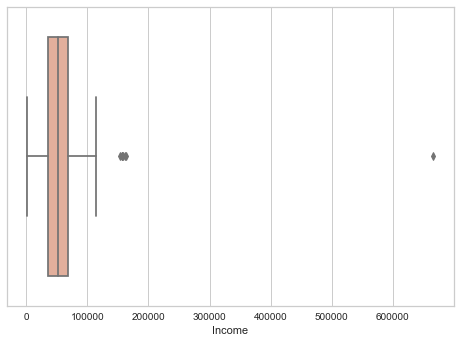

In [25]:
sns.boxplot(x = data3['Income'], color= '#eea990')
plt.show()

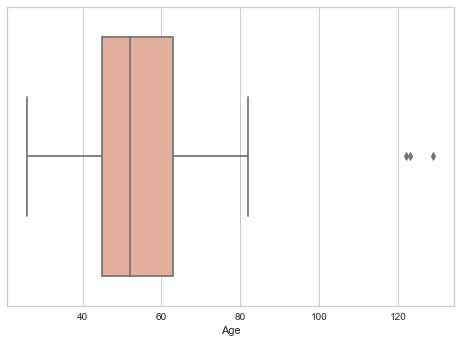

In [26]:
sns.boxplot(x = data3['Age'], color= '#eea990')
plt.show()

Removing the outliers from age and income column.

In [28]:
data3 = data3[(data3["Age"]<90)]
data3 = data3[(data3["Income"]<120000)]

In [29]:
data3.reset_index(drop=True,inplace=True)
data3.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,0.15102,53.095692,0.948753,2.593651,606.821769,12.569615
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.35815,11.705801,0.749231,0.906197,601.675284,7.180350
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,26.000000,0.000000,1.000000,5.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.000000,0.000000,2.000000,69.000000,6.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,52.000000,1.000000,3.000000,397.000000,12.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,63.000000,1.000000,3.000000,1047.000000,18.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,82.000000,3.000000,5.000000,2525.000000,32.000000


## Data Preprocessing

In [30]:
data4 = data3.copy()

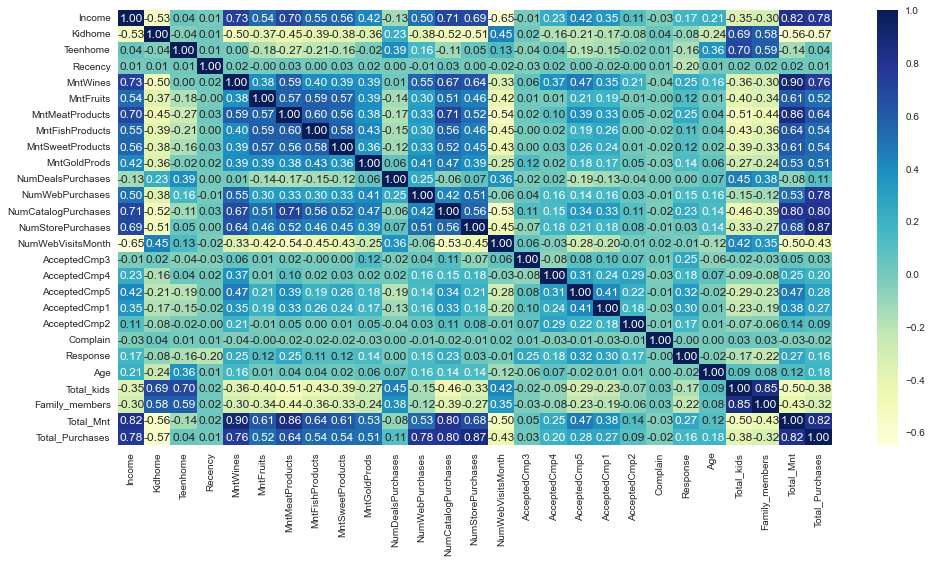

In [31]:
plt.figure(figsize= (16, 8))
sns.heatmap(data4.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

We will perform the following transformtions:-

1)Skew log transformation of some features.

2)Encoding the Categorical data.

3)Standard scaling all the features. 

4)Dimension Reduction (readuce to 3D).

In [32]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Income,0.013155,0.013155,False
1,Kidhome,0.635063,0.635063,True
2,Teenhome,0.404348,0.404348,False
3,Recency,-0.001873,0.001873,False
4,MntWines,1.166123,1.166123,True
5,MntFruits,2.097852,2.097852,True
6,MntMeatProducts,1.817678,1.817678,True
7,MntFishProducts,1.910727,1.910727,True
8,MntSweetProducts,2.096927,2.096927,True
9,MntGoldProds,1.833219,1.833219,True


As we can most of the feature are skewed, so i will apply Log transformation

In [33]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data4[column] = np.log1p(data4[column])

Now most of our featurea are Transformed, now i will encode the catagorical feature.

In [34]:
data5 = data4.copy()

In [35]:
data5 = pd.get_dummies(data5)

In [36]:
data5.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Partner,Relationship_status_Single,Education_status_Graduate,Education_status_Post_Graduate,Education_status_Undergraduate
0,58138.0,0.000000,0,2012-04-09,58,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,2.197225,2.397895,1.609438,7,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,65,0,1,7.388946,22,0,1,1,0,0
1,46344.0,0.693147,1,2014-08-03,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147,1.098612,5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68,2,3,3.332205,4,0,1,1,0,0
2,71613.0,0.000000,0,2013-08-21,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612,2.397895,4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,57,0,2,6.655440,20,1,0,1,0,0
3,26646.0,0.693147,0,2014-10-02,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000,1.609438,6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,38,1,3,3.988984,6,1,0,1,0,0
4,58293.0,0.693147,0,2014-01-19,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294,1.945910,5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,41,1,3,6.047372,14,1,0,0,1,0


Our catagorical features are encoded, now we will do feature scaling.

In [37]:
data6 = data5.copy()

In [38]:
data6.drop(["Dt_Customer"],axis=1,inplace=True)

scaler = StandardScaler()
scaler.fit(data6)

data6 = pd.DataFrame(scaler.transform(data6), columns=data6.columns)

In [39]:
data6.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Partner,Relationship_status_Single,Education_status_Graduate,Education_status_Post_Graduate,Education_status_Undergraduate
0,0.314651,-0.842265,-0.930767,0.310830,0.981921,1.428559,1.398364,1.574716,1.407546,1.059762,0.658787,1.284113,1.813984,-0.416569,0.689203,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,2.370996,1.017189,-1.266589,-1.759012,1.202414,1.313658,-1.347625,1.347625,0.990521,-0.784465,-0.359211
1,-0.254877,1.100593,0.906602,-0.380600,-1.222332,-0.990259,-1.406008,-0.870793,-0.976191,-0.921818,0.039981,-1.422883,-0.410450,-1.485798,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,1.273530,1.403420,0.448513,-1.565416,-1.193752,-1.347625,1.347625,0.990521,-0.784465,-0.359211
2,0.965354,-0.842265,-0.930767,-0.795458,0.760726,1.061091,0.463848,1.312479,0.529795,0.492862,-0.832178,1.284113,0.118619,1.233783,-0.554069,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,0.333612,-1.266589,-0.655250,0.701958,1.035057,0.742046,-0.742046,0.990521,-0.784465,-0.359211
3,-1.206087,1.100593,-0.930767,-0.795458,-1.222332,-0.406318,-0.699138,-0.087153,-0.540863,-1.041949,0.039981,-0.693139,-1.314901,-0.416569,0.274779,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.289883,0.068415,0.448513,-1.117309,-0.915151,0.742046,-0.742046,0.990521,-0.784465,-0.359211
4,0.322136,1.100593,-0.930767,1.555404,0.262319,0.979624,0.416939,0.788748,0.681255,-0.277576,1.530946,0.554368,0.494000,0.287715,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.033542,0.068415,0.448513,0.287086,0.199254,0.742046,-0.742046,-1.009570,1.274755,-0.359211


Now we will do Dimensionality Reduction through the method of PCA and will reduce dimensions to 3.

After reduction we will plot it.

In [40]:
pca = PCA(n_components=3)
pca.fit(data6)
data7 = pd.DataFrame(pca.transform(data6), columns=(["col1","col2", "col3"]))
data7.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-4.400612e-17,3.183590,-7.100336,-2.928732,-0.026223,2.971864,8.165195
col2,2205.0,-8.599823e-17,1.799023,-4.929692,-1.311067,-0.155388,1.369683,5.897102
col3,2205.0,5.457967e-17,1.492655,-2.669947,-1.303913,-0.024831,0.948164,5.028222


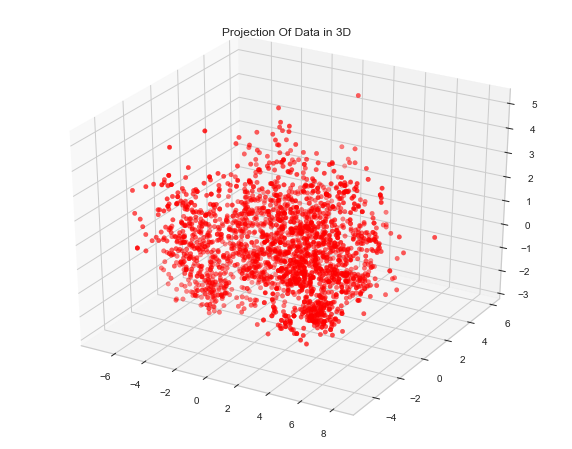

In [41]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data7["col1"],data7["col2"],data7["col3"], c="red", marker="o")
ax.set_title("Projection Of Data in 3D")
plt.show()

## Clustering

I will do Agglomerative Clustering. The steps are:-

1)Finding right number of cluster through elbow method.

2)Fitting Agglomerative Clustering model.

3)Examining the clusters.

In [42]:
data8 = data7.copy()

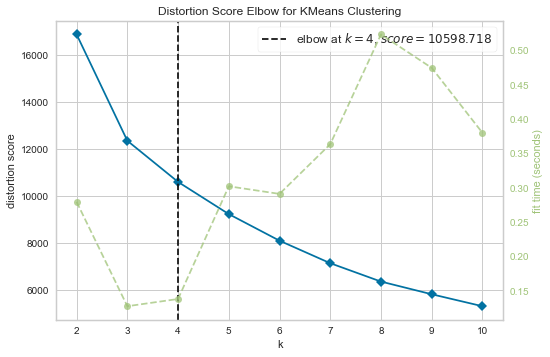

In [43]:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(data8)
Elbow.show()

In [44]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(data8)

data8["Clusters"] = yhat_AC

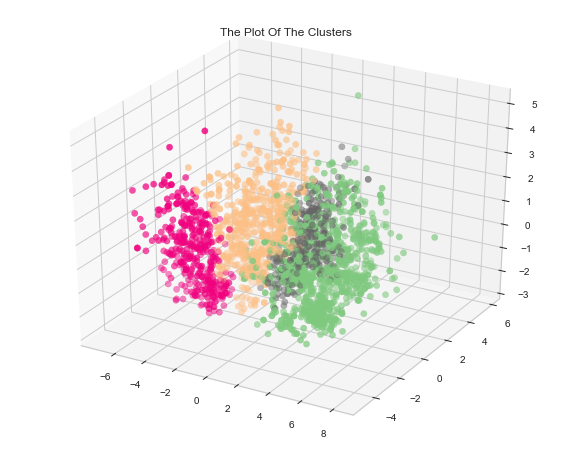

In [45]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(data8["col1"],data8["col2"],data8["col3"], s=40, c=data8["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()

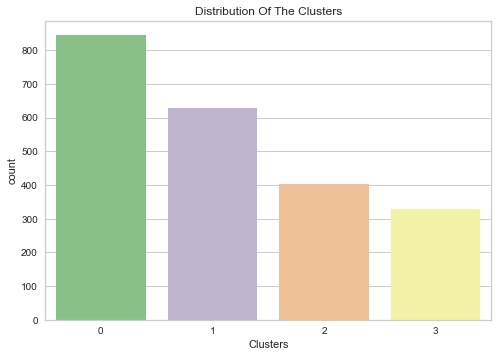

In [46]:
fig = sns.countplot(x=data8["Clusters"], palette= "Accent")
fig.set_title("Distribution Of The Clusters")
plt.show()

## Classification

Now I will do the preduction of the cluster through Random Forest Classification

In [47]:
data9 = data6.copy()

In [48]:
data9["Clusters"] = data8.loc[:,"Clusters"]

In [49]:
data9.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Family_members,Total_Mnt,Total_Purchases,Relationship_status_Partner,Relationship_status_Single,Education_status_Graduate,Education_status_Post_Graduate,Education_status_Undergraduate,Clusters
0,0.314651,-0.842265,-0.930767,0.310830,0.981921,1.428559,1.398364,1.574716,1.407546,1.059762,0.658787,1.284113,1.813984,-0.416569,0.689203,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,2.370996,1.017189,-1.266589,-1.759012,1.202414,1.313658,-1.347625,1.347625,0.990521,-0.784465,-0.359211,2
1,-0.254877,1.100593,0.906602,-0.380600,-1.222332,-0.990259,-1.406008,-0.870793,-0.976191,-0.921818,0.039981,-1.422883,-0.410450,-1.485798,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,1.273530,1.403420,0.448513,-1.565416,-1.193752,-1.347625,1.347625,0.990521,-0.784465,-0.359211,0
2,0.965354,-0.842265,-0.930767,-0.795458,0.760726,1.061091,0.463848,1.312479,0.529795,0.492862,-0.832178,1.284113,0.118619,1.233783,-0.554069,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,0.333612,-1.266589,-0.655250,0.701958,1.035057,0.742046,-0.742046,0.990521,-0.784465,-0.359211,2
3,-1.206087,1.100593,-0.930767,-0.795458,-1.222332,-0.406318,-0.699138,-0.087153,-0.540863,-1.041949,0.039981,-0.693139,-1.314901,-0.416569,0.274779,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.289883,0.068415,0.448513,-1.117309,-0.915151,0.742046,-0.742046,0.990521,-0.784465,-0.359211,0
4,0.322136,1.100593,-0.930767,1.555404,0.262319,0.979624,0.416939,0.788748,0.681255,-0.277576,1.530946,0.554368,0.494000,0.287715,-0.139645,-0.282531,-0.283466,-0.280655,-0.262358,-0.117444,-0.095673,-0.421764,-1.033542,0.068415,0.448513,0.287086,0.199254,0.742046,-0.742046,-1.009570,1.274755,-0.359211,3


In [54]:
X = data9.iloc[:, :-1].values
y = data9.iloc[:, -1].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [58]:
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [67]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[210   2   0   3]
 [  0 144   6   8]
 [  0   0  97   0]
 [  3   5   0  74]]


0.9510869565217391

In [66]:
final = pd.DataFrame()
final["Acctuate"] = y_test
final["Predicted"] = y_pred
final

,Acctuate,Predicted
0,2,2
1,3,3
2,1,1
3,1,3
4,1,1
...,...,...
547,2,2
548,0,0
549,1,1
550,3,3
